# Problem Statement
### Gold prices are difficult to forecast due to externalities, but our aim is to build the model which can help us to understand the pattern and make smart decision for customers and businesses.

## EDA
  - EDA is a crucial but important step in data analysis.
  - Exploratory data analysis is an approach to analyze the data using visualization and statistical techniques.

# Steps in EDA
  - Describing the data
  - Data Cleaning
  - Data Manupilation
  - Data Analysis & Visualization
  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold.csv')

In [4]:
gold.head(10)

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
5,2016-01-06,2617.70
6,2016-01-07,2903.80
7,2016-01-08,2887.80
8,2016-01-09,2813.80
9,2016-01-10,2786.80


In [5]:
gold.tail(10)

,date,price
2172,2021-12-12,4333.5
2173,2021-12-13,4351.4
2174,2021-12-14,4328.2
2175,2021-12-15,4348.7
2176,2021-12-16,4399.8
2177,2021-12-17,4394.4
2178,2021-12-18,4389.5
2179,2021-12-19,4389.5
2180,2021-12-20,4354.1
2181,2021-12-21,4346.5


In [6]:
gold.shape

(2182, 2)

# Duplicate values / Null Values

Finding the null values is the most important step in the EDA.ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [8]:
#Find null values

gold.isnull().sum()

date     0
price    0
dtype: int64

## You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data

In [9]:
#Find the duplicates
gold.duplicated().sum()
0

0

In [10]:
gold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2182 entries, 0 to 2181
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2182 non-null   object 
 1   price   2182 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [11]:
gold.describe()

,price
count,2182.000000
mean,3284.450046
std,719.564434
min,2252.600000
25%,2697.020000
50%,2879.800000
75%,4147.325000
max,4966.300000


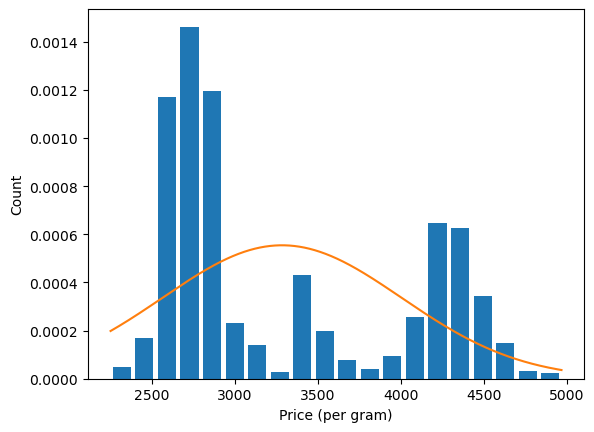

In [12]:
plt.hist(gold.price, bins=20, rwidth=0.8, density=True)
plt.xlabel('Price (per gram)')
plt.ylabel('Count')

rng = np.arange(gold.price.min(), gold.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,gold.price.mean(),gold.price.std()))

# Outlier Detection

In [13]:
gold['date']=pd.to_datetime(gold['date'])

In [14]:
gold['year']=gold['date'].dt.year
yearly_data = gold.groupby('year')

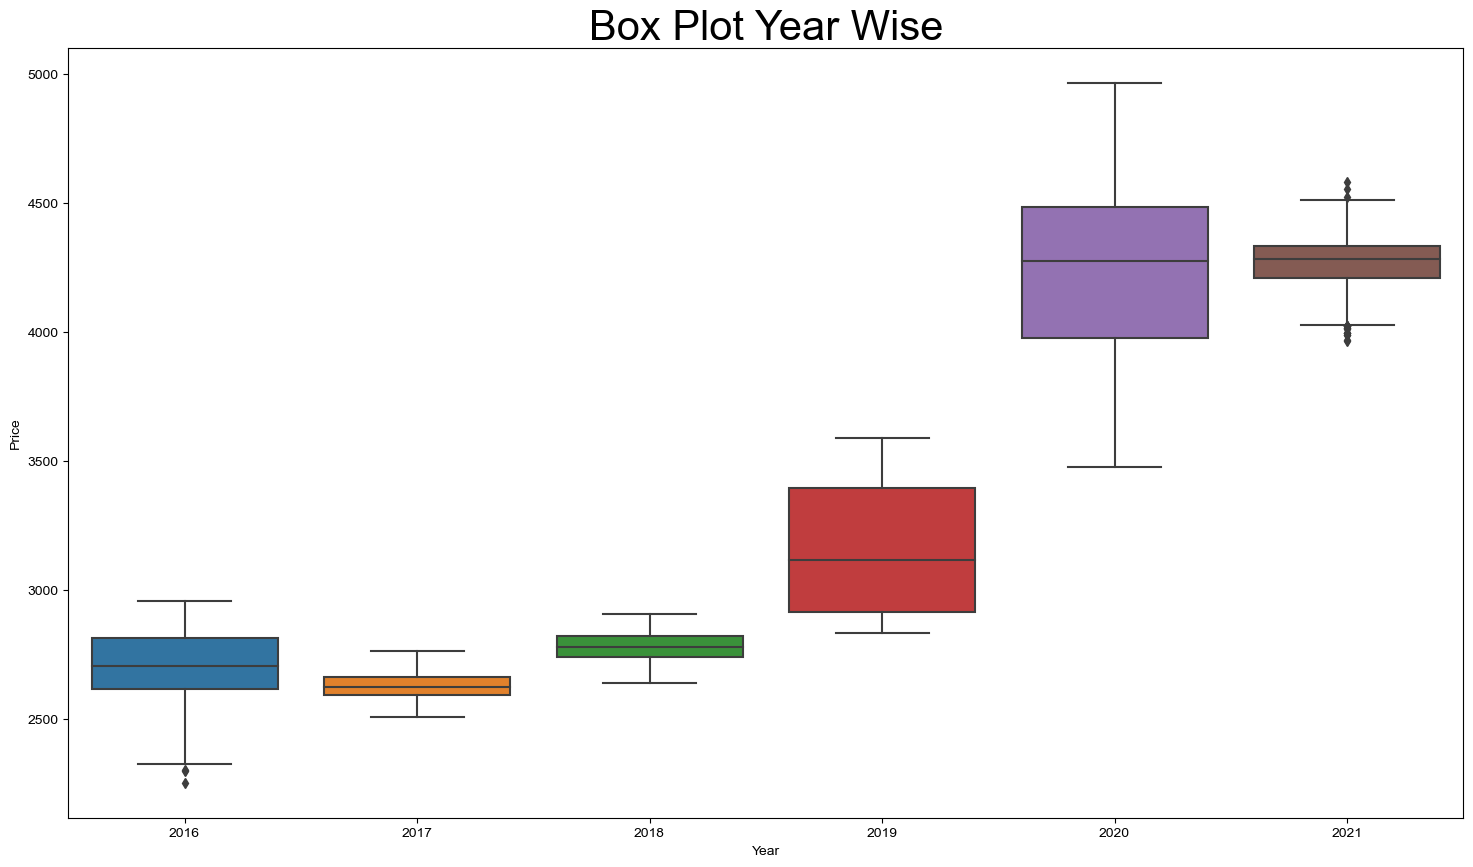

In [15]:
plt.figure(figsize=(18,10))
ax=sns.boxplot(x='year', y='price', data=gold)
sns.set_style("whitegrid")
plt.xlabel("Year")
plt.ylabel("Price")
ax.set_title('Box Plot Year Wise',fontsize=30)
plt.show()

In [16]:
def cap_outliers(x):
    Q1=x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    upper_cap = Q3 + 1.5 * IQR 
    lower_cap = Q1 - 1.5 * IQR
    capped_values = np.clip(x, lower_cap, upper_cap)
    return capped_values

In [17]:
#capping Method to replace outliers
capped_data = yearly_data.apply(lambda x: cap_outliers(x['price']))

In [18]:
gold['new_price'] = capped_data.reset_index(level=0, drop=True)

In [19]:
gold.to_csv('cleaned_data.csv', index=False)

In [20]:
gold1 = pd.read_csv('cleaned_data.csv')

In [21]:
gold1.head(10)

,date,price,year,new_price
0,2016-01-01,2252.60,2016,2325.70
1,2016-01-02,2454.50,2016,2454.50
2,2016-01-03,2708.10,2016,2708.10
3,2016-01-04,2577.80,2016,2577.80
4,2016-01-05,2597.75,2016,2597.75
5,2016-01-06,2617.70,2016,2617.70
6,2016-01-07,2903.80,2016,2903.80
7,2016-01-08,2887.80,2016,2887.80
8,2016-01-09,2813.80,2016,2813.80
9,2016-01-10,2786.80,2016,2786.80


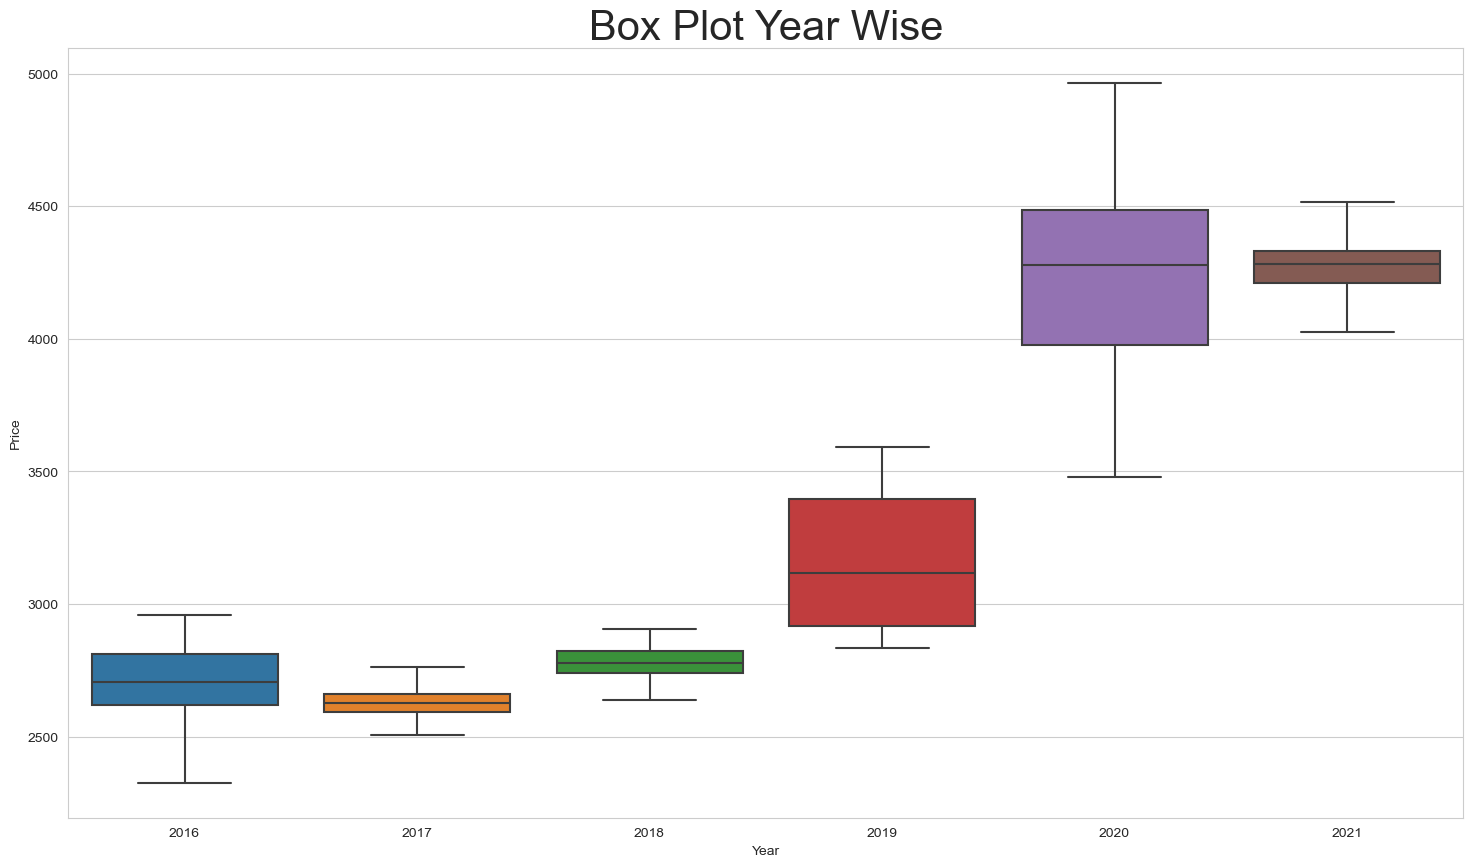

In [22]:
plt.figure(figsize=(18,10))
ax=sns.boxplot(x='year', y='new_price', data=gold1)
sns.set_style("whitegrid")
plt.xlabel("Year")
plt.ylabel("Price")
ax.set_title('Box Plot Year Wise',fontsize=30)
plt.show()

In [23]:
gold2 = gold1.drop(columns=['year','price'],axis=1)

In [24]:
gold2

,date,new_price
0,2016-01-01,2325.70
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [25]:
gold2['date'] = pd.to_datetime(gold2['date'])
gold2.set_index('date',inplace=True)

## Data Visualisation

Text(0.5, 1.0, 'Gold Price Trend')

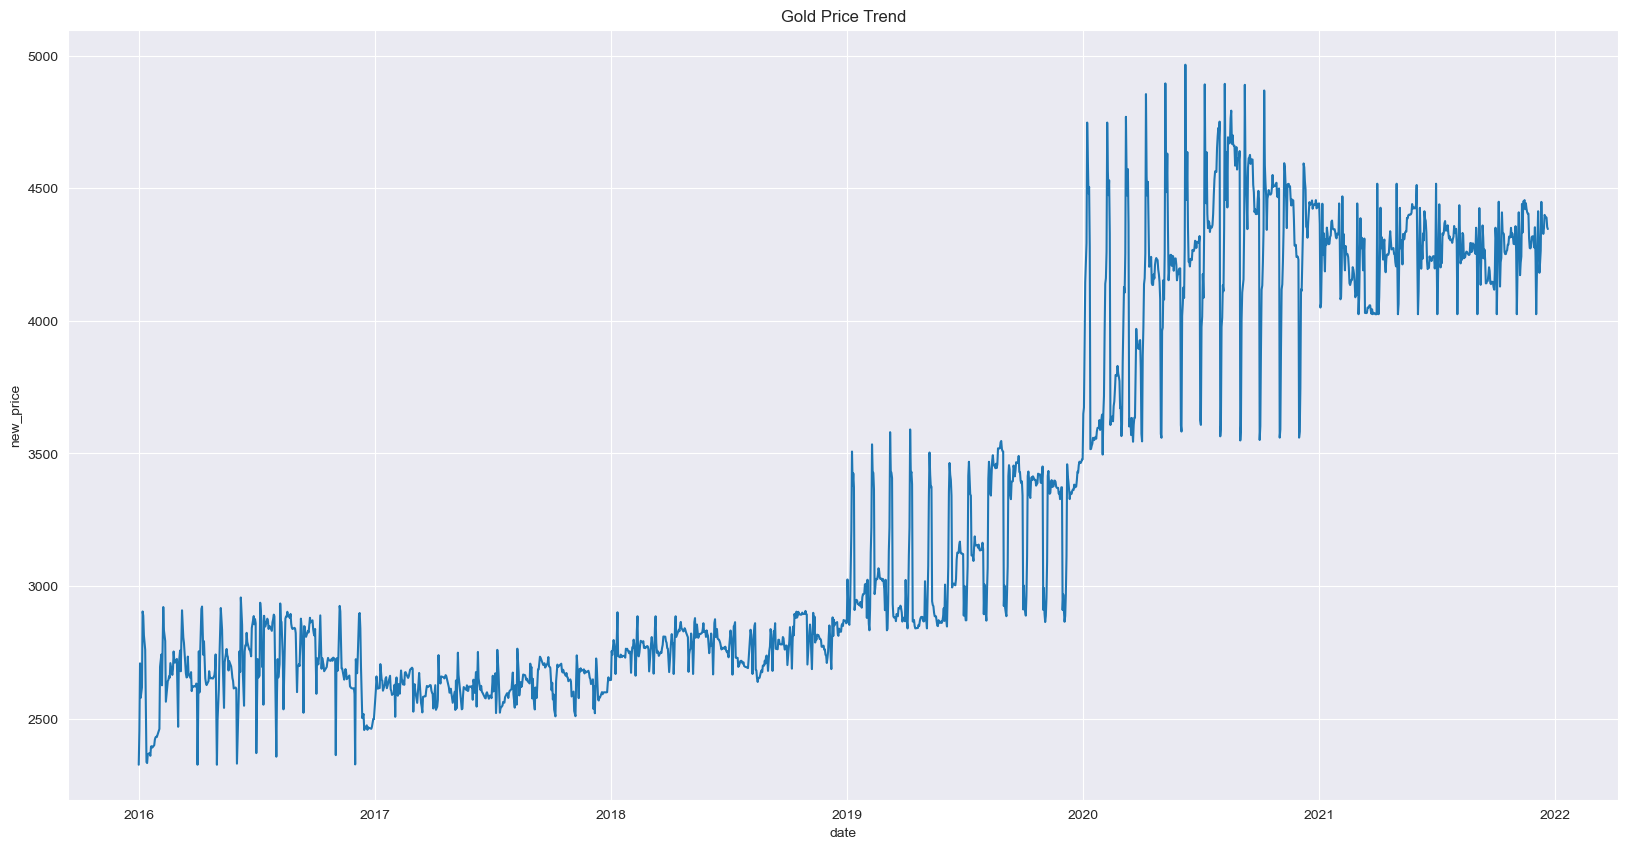

In [26]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(x='date',y='new_price',data=gold2)
plt.title('Gold Price Trend')

# Time Series Decomposition:

In [27]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

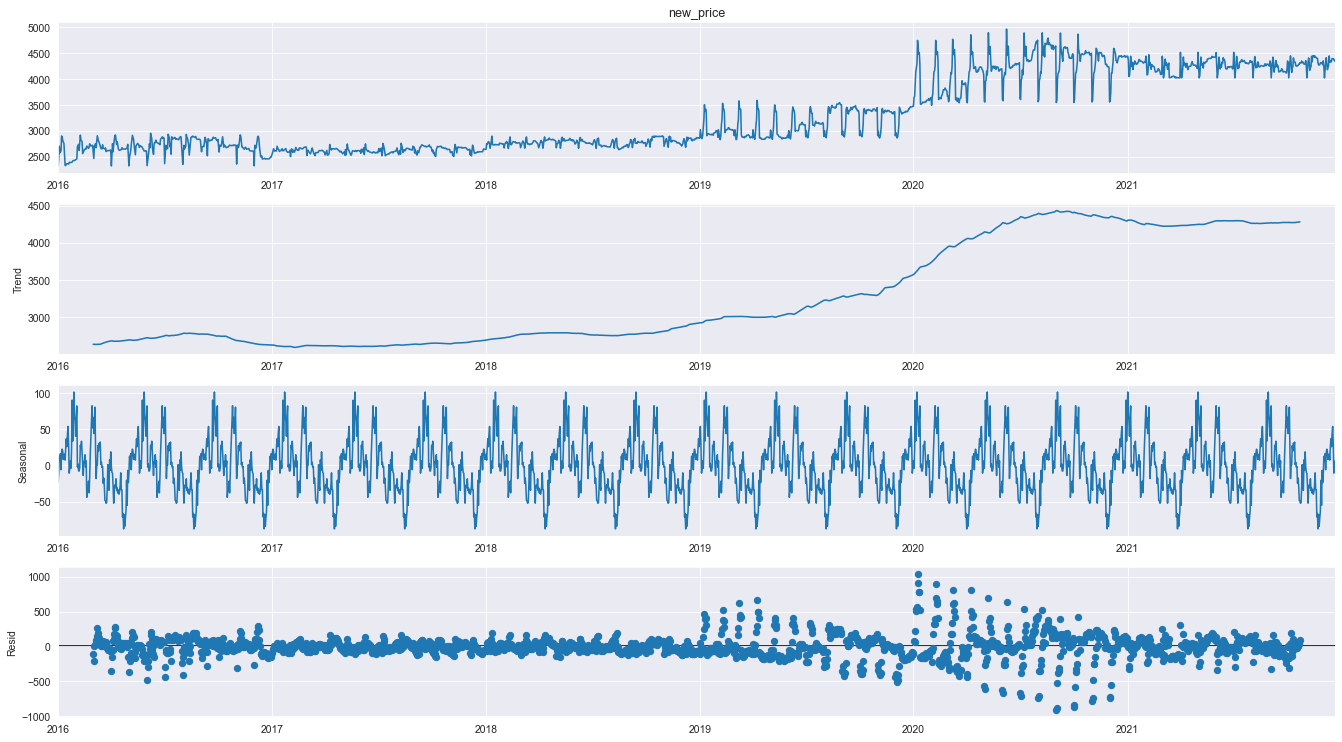

In [28]:
plt.rcParams.update({'figure.figsize':(18,10), 'figure.dpi':75})
decomposition = sm.tsa.seasonal_decompose(gold2['new_price'], period=120)
decomposition.plot()
plt.show()

#  Testing For Stationarity

In [29]:
from statsmodels.tsa.stattools import adfuller

Null Hypothesis (H0):
If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1):
The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. We interpret this result using the p-value from the test.

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [30]:
test_result = adfuller(gold2['new_price'])

In [31]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(new_price):
    result=adfuller(new_price)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [32]:
adfuller_test(gold2['new_price'])

ADF Test Statistic : -0.3030055771340783
p-value : 0.9250775725463221
#Lags Used : 26
Number of Observations Used : 2155
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [33]:
gold2['Price First Difference'] = gold2.diff()

In [34]:
gold2.head(10)

,new_price,Price First Difference
date,,
2016-01-01,2325.70,NaN
2016-01-02,2454.50,128.80
2016-01-03,2708.10,253.60
2016-01-04,2577.80,-130.30
2016-01-05,2597.75,19.95
2016-01-06,2617.70,19.95
2016-01-07,2903.80,286.10
2016-01-08,2887.80,-16.00
2016-01-09,2813.80,-74.00


In [35]:
adfuller_test(gold2['Price First Difference'].dropna())

ADF Test Statistic : -21.754861010581934
p-value : 0.0
#Lags Used : 26
Number of Observations Used : 2154
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


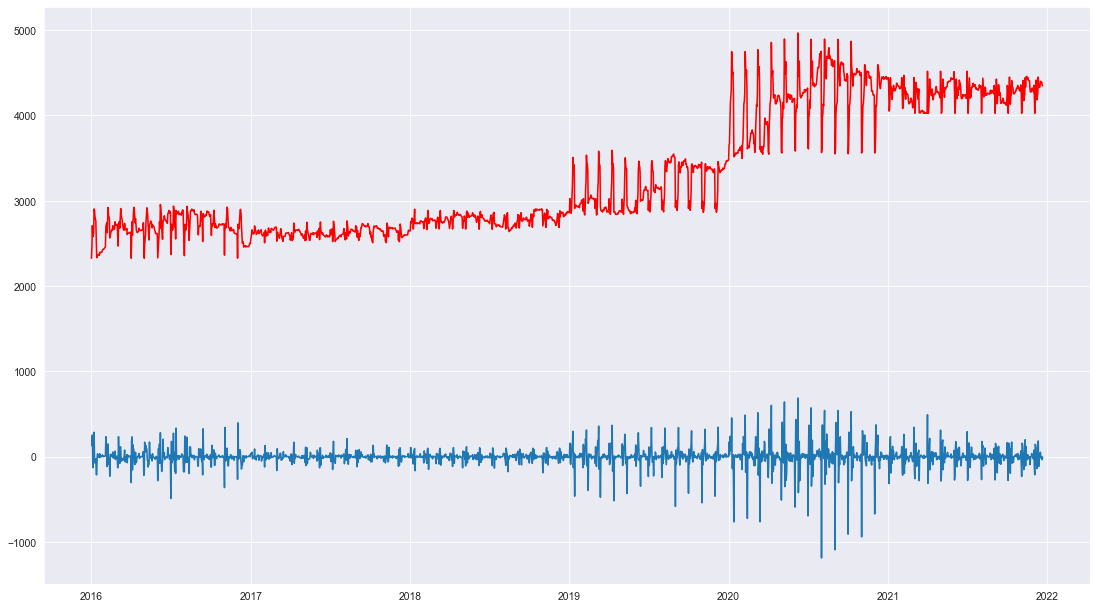

In [36]:
plt.plot(gold2['new_price'],color='red',label='new_price')
plt.plot(gold2['Price First Difference'])

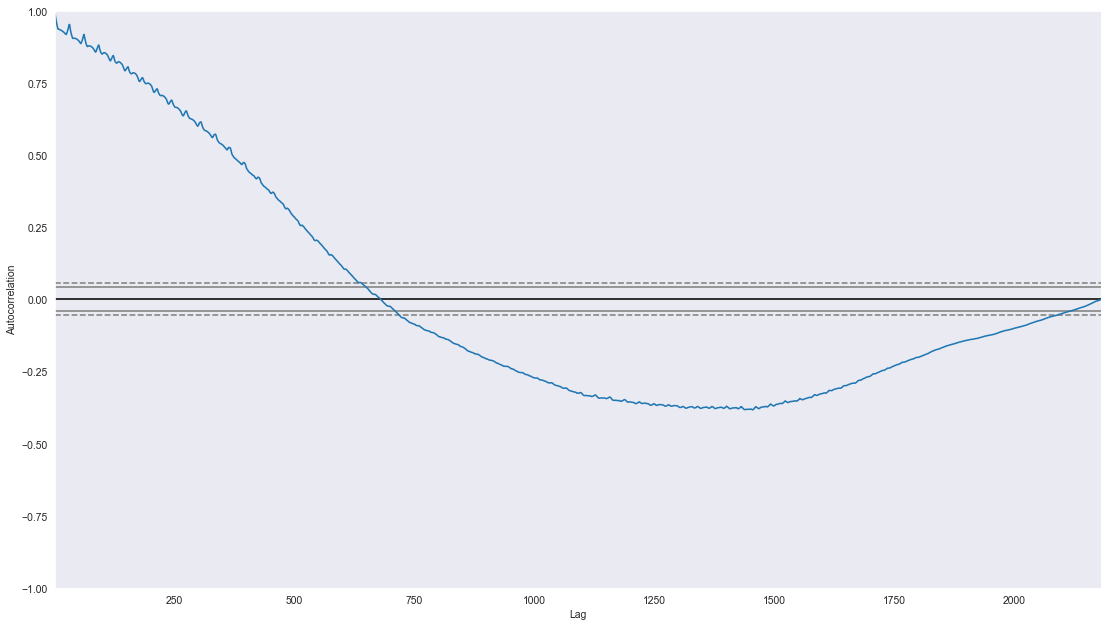

In [37]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(gold2['new_price'])
plt.show()

In [38]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

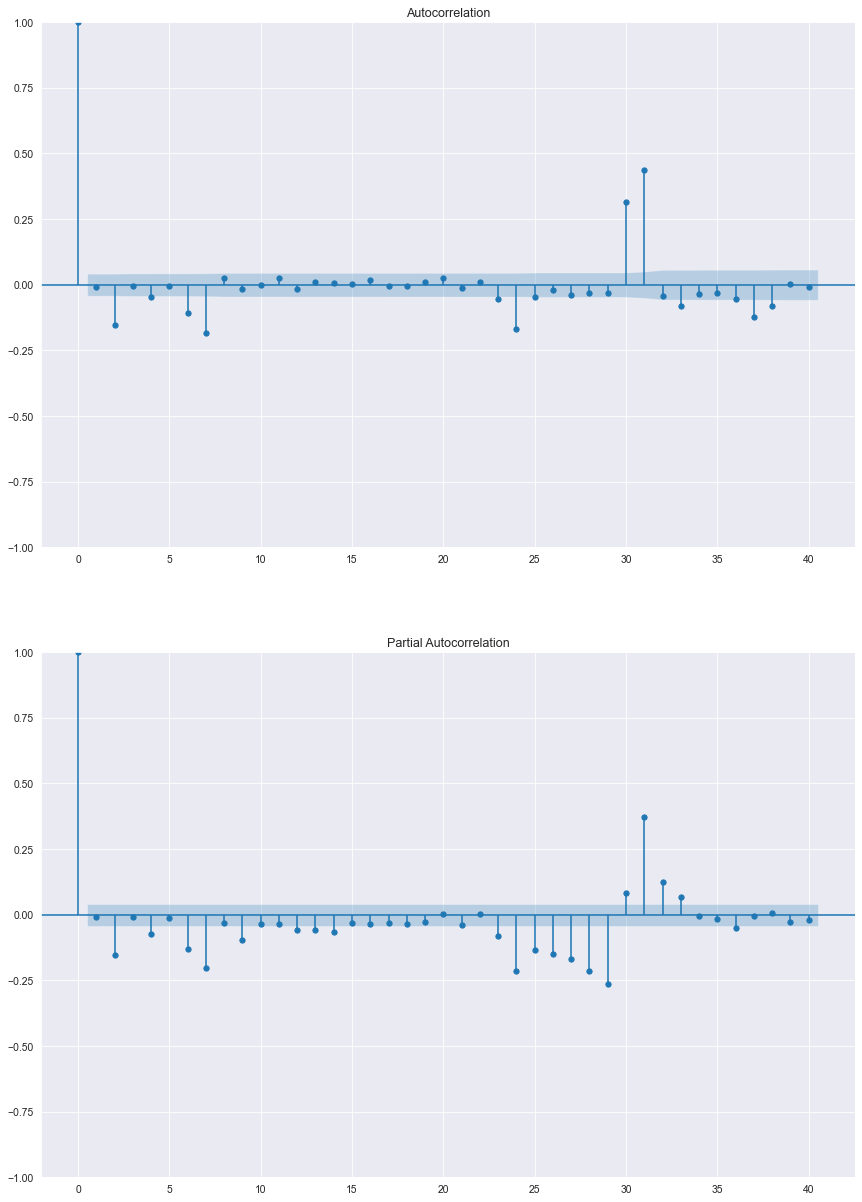

In [39]:
fig = plt.figure(figsize=(14,20))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(gold2['Price First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(gold2['Price First Difference'].iloc[13:],lags=40,ax=ax2)

In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=4.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=4.

# Model Building

# 1. Prophet

In [40]:
#!pip install prophet

In [41]:
from prophet import Prophet
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly as py
warnings.filterwarnings("ignore")

In [42]:
gold3=gold1.copy()

In [43]:
gold3 = gold1.drop(columns=['year','price'],axis=1)
gold3

,date,new_price
0,2016-01-01,2325.70
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75
...,...,...
2177,2021-12-17,4394.40
2178,2021-12-18,4389.50
2179,2021-12-19,4389.50
2180,2021-12-20,4354.10


In [44]:
gold3.columns = ["ds","y"]

model = Prophet()
model.fit(gold3)

20:57:40 - cmdstanpy - INFO - Chain [1] start processing
20:57:41 - cmdstanpy - INFO - Chain [1] done processing


In [45]:
future = model.make_future_dataframe(periods= 30, freq='d')

In [46]:
forecast = model.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2207,2022-01-16,4247.728233,4038.272837,4451.444665,4246.958659,4248.726213,9.146714,9.146714,9.146714,-1.460148,-1.460148,-1.460148,10.606862,10.606862,10.606862,0.0,0.0,0.0,4256.874947
2208,2022-01-17,4247.509970,4042.409727,4468.976727,4246.579463,4248.634398,5.718573,5.718573,5.718573,0.244347,0.244347,0.244347,5.474225,5.474225,5.474225,0.0,0.0,0.0,4253.228543
2209,2022-01-18,4247.291708,4020.972814,4459.250938,4246.182973,4248.656924,1.995372,1.995372,1.995372,1.406263,1.406263,1.406263,0.589109,0.589109,0.589109,0.0,0.0,0.0,4249.287080
2210,2022-01-19,4247.073445,4025.590321,4495.991155,4245.793536,4248.542220,-3.147322,-3.147322,-3.147322,0.789710,0.789710,0.789710,-3.937032,-3.937032,-3.937032,0.0,0.0,0.0,4243.926122
2211,2022-01-20,4246.855182,4015.593049,4447.116726,4245.264445,4248.531464,-6.523428,-6.523428,-6.523428,1.480146,1.480146,1.480146,-8.003574,-8.003574,-8.003574,0.0,0.0,0.0,4240.331754


In [47]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head()

,ds,yhat,yhat_lower,yhat_upper
0,2016-01-01,2626.069044,2405.178807,2851.467200
1,2016-01-02,2636.000085,2428.676934,2848.894458
2,2016-01-03,2637.956080,2431.499160,2845.371542
3,2016-01-04,2643.060370,2420.959172,2862.178012
4,2016-01-05,2646.582012,2439.172942,2842.373468


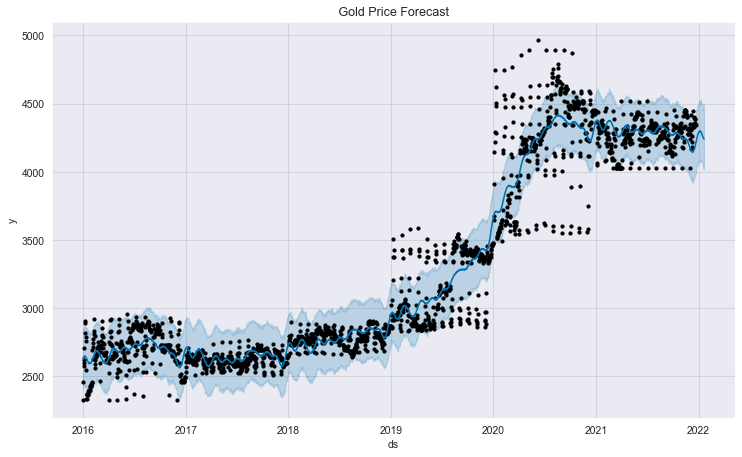

In [48]:
model.plot(forecast);
plt.title(" Gold Price Forecast ")
plt.show()

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# calculate MAE between expected and predicted values for next 60 mont
y_true = gold3['y'].values
y_pred = forecast['yhat'][:-30].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.2f' % mae)
r = r2_score(y_true, y_pred)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(y_true, y_pred)
print('RMSE: %.2f' % rmse)

MAE: 111.61
R-squared Score: 0.95
RMSE: 28354.73


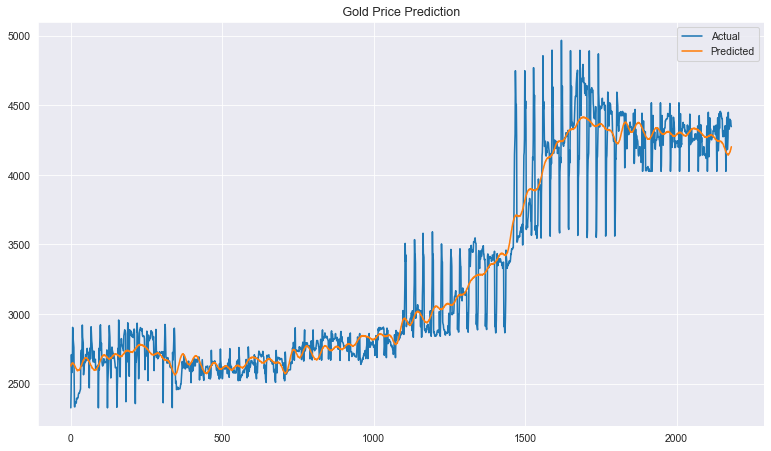

In [50]:
plt.figure(figsize=(12.5,7))
# plot expected vs actual
plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title(" Gold Price Prediction ")
plt.grid(True)
plt.legend()
plt.show()

# 2.LSTM

In [51]:
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, Dropout, Activation, Dense, LSTM
from tensorflow.compat.v1.keras.layers import CuDNNLSTM
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

In [52]:
gold4 = gold1.copy()

In [53]:
gold4 = gold1.drop(columns=['year','price'],axis=1)

In [54]:
scaler = MinMaxScaler()
# fit the format of the scaler -> convert shape from (1000, ) -> (1000, 1)
price = gold4.new_price.values.reshape(-1, 1)
scaled = scaler.fit_transform(price)

seq_len = 60

def split_into_sequences(data, seq_len):
    n_seq = len(data) - seq_len + 1
    return np.array([data[i:(i+seq_len)] for i in range(n_seq)])

def get_train_test_sets(data, seq_len, train_frac):
    sequences = split_into_sequences(data, seq_len)
    n_train = int(sequences.shape[0] * train_frac)
    x_train = sequences[:n_train, :-1, :]
    y_train = sequences[:n_train, -1, :]
    x_test = sequences[n_train:, :-1, :]
    y_test = sequences[n_train:, -1, :]
    return x_train, y_train, y_test, y_test

x_train, y_train, x_test, y_test = get_train_test_sets(scaled, seq_len, train_frac=0.8)

In [55]:
# fraction of the input to drop; helps prevent overfitting
dropout = 0.2
window_size = seq_len - 1

# build a 3-layer LSTM RNN
model = keras.Sequential()

model.add(LSTM(window_size, return_sequences=True, input_shape=(window_size, x_train.shape[-1])))
model.add(Dropout(rate=dropout))
# Bidirectional allows for training of sequence data forwards and backwards
model.add(Bidirectional(LSTM((window_size * 2), return_sequences=True))) 
model.add(Dropout(rate=dropout))
model.add(Bidirectional(LSTM(window_size, return_sequences=False))) 
model.add(Dense(units=1))
# linear activation function: activation is proportional to the input
model.add(Activation('linear'))

model.compile(loss='mean_squared_error',optimizer='adam')
history = model.fit(x_train,y_train,epochs=10,batch_size=32,shuffle=False,validation_split=0.2)

Epoch 1/10
43/43 [==============================] - 31s 338ms/step - loss: 0.0033 - val_loss: 0.0412
Epoch 2/10
43/43 [==============================] - 7s 167ms/step - loss: 0.0034 - val_loss: 0.0707
Epoch 3/10
43/43 [==============================] - 7s 163ms/step - loss: 0.0033 - val_loss: 0.0830
Epoch 4/10
43/43 [==============================] - 7s 153ms/step - loss: 0.0035 - val_loss: 0.0904
Epoch 5/10
43/43 [==============================] - 7s 154ms/step - loss: 0.0035 - val_loss: 0.0882
Epoch 6/10
43/43 [==============================] - 7s 164ms/step - loss: 0.0039 - val_loss: 0.0663
Epoch 7/10
43/43 [==============================] - 7s 160ms/step - loss: 0.0041 - val_loss: 0.0915
Epoch 8/10
43/43 [==============================] - 8s 184ms/step - loss: 0.0049 - val_loss: 0.0818
Epoch 9/10
43/43 [==============================] - 7s 169ms/step - loss: 0.0055 - val_loss: 0.0743
Epoch 10/10
43/43 [==============================] - 6s 150ms/step - loss: 0.0073 - val_loss: 0.039

14/14 [==============================] - 4s 7ms/step


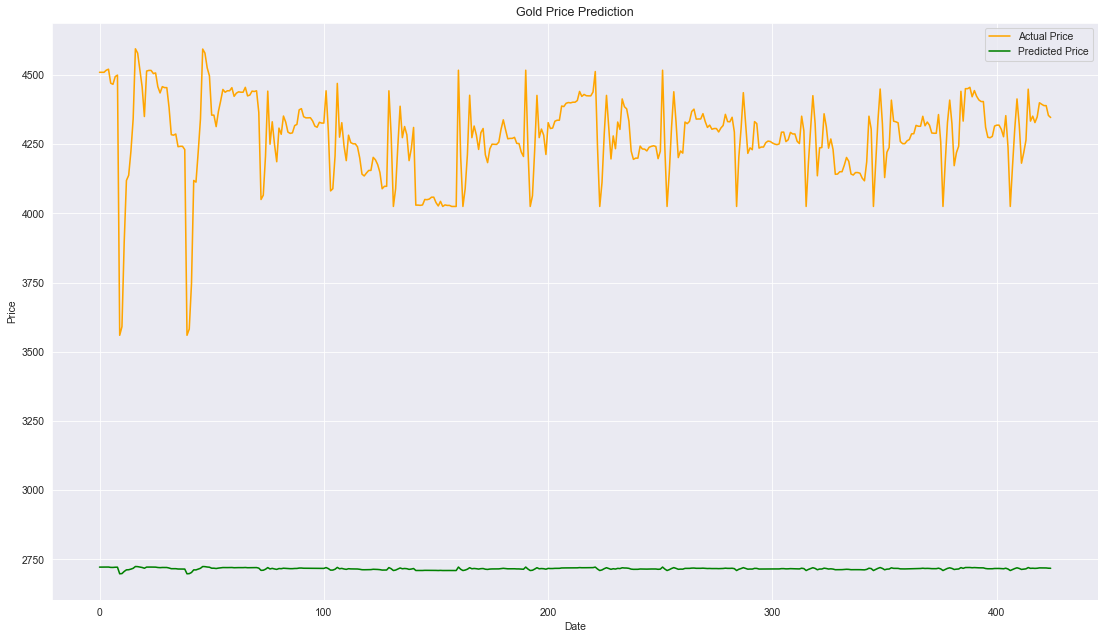

In [56]:
y_pred = model.predict(x_test)

# invert the scaler to get the absolute price data
y_test_orig = scaler.inverse_transform(y_test)
y_pred_orig = scaler.inverse_transform(y_pred)

# plots of prediction against actual data
plt.plot(y_test_orig, label='Actual Price', color='orange')
plt.plot(y_pred_orig, label='Predicted Price', color='green')
 
plt.title('Gold Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show();

In [57]:
mae = mean_absolute_error(y_test_orig, y_pred_orig)
print('MAE: %.2f' % mae)
r = r2_score(y_test_orig, y_pred_orig)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(y_test_orig, y_pred_orig)
print('RMSE: %.2f' % rmse)

MAE: 1564.11
R-squared Score: -117.50
RMSE: 2466214.60


# 3. ARIMA

In [58]:
gold4 = gold1.copy()
gold4

,date,price,year,new_price
0,2016-01-01,2252.60,2016,2325.70
1,2016-01-02,2454.50,2016,2454.50
2,2016-01-03,2708.10,2016,2708.10
3,2016-01-04,2577.80,2016,2577.80
4,2016-01-05,2597.75,2016,2597.75
...,...,...,...,...
2177,2021-12-17,4394.40,2021,4394.40
2178,2021-12-18,4389.50,2021,4389.50
2179,2021-12-19,4389.50,2021,4389.50
2180,2021-12-20,4354.10,2021,4354.10


In [59]:
gold4 = gold1.drop(columns=['year','price'],axis=1)

In [60]:
from statsmodels.tsa.arima.model import ARIMA

In [61]:
arima = ARIMA(gold4['new_price'], order=(3,1,2)).fit()
predictions = arima.predict()

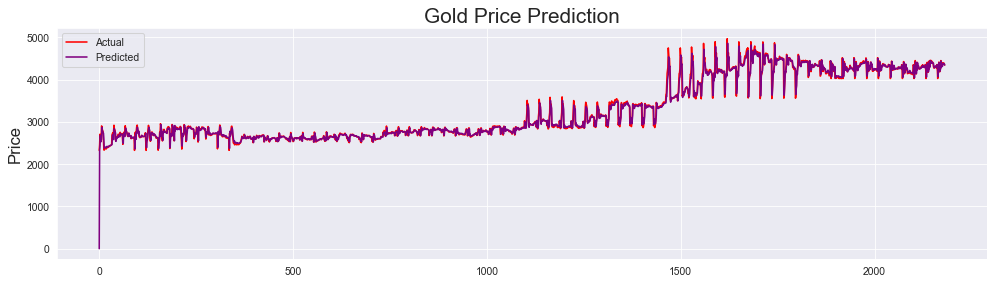

In [62]:
plt.figure(figsize=(16,4))
plt.plot(gold4.new_price, label="Actual",  color='red')
plt.plot(predictions, label="Predicted",  color='purple')
plt.title('Gold Price Prediction', fontsize=20)
plt.ylabel('Price', fontsize=16)
plt.legend()

In [63]:
mae = mean_absolute_error(gold4.new_price, predictions)
print('MAE: %.2f' % mae)
r = r2_score(gold4.new_price, predictions)
print('R-squared Score: %.2f' % r)
rmse = mean_squared_error(gold4.new_price, predictions)
print('RMSE: %.2f' % rmse)

MAE: 57.22
R-squared Score: 0.97
RMSE: 14022.37
